In [112]:
import torch
from algebra.cliffordalgebra import CliffordAlgebra
# from gp import SteerableGeometricProductLayer
import matplotlib.pyplot as plt

In [113]:
ca = CliffordAlgebra((1, 1))

In [114]:
# meshgrid
x = torch.linspace(-1, 1, 128)
y = torch.linspace(-1, 1, 128)

x, y = torch.meshgrid(x, y, indexing='xy')

In [115]:
X = torch.stack([x, y], dim=-1).reshape(-1, 2)
X = ca.embed_grade(X, 1)

In [116]:
z = torch.tensor([[0, 1, 0, 0]]).float()


In [117]:
result = ca.geometric_product(z, X)

In [118]:
B = ca.get_grade(result, 2)

In [119]:
B = B.reshape(128, 128)

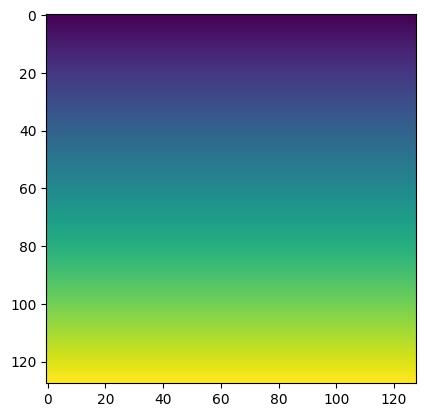

In [120]:
plt.imshow(B)

In [121]:
bv = ca.random_grade(2)
bv = bv / ca.norm(bv)
# Rotate by 2pi / 8 
num_rotations = 128
R = ca.exponential(bv * torch.pi / num_rotations)

/home/druhe/rail1/src/cnf/algebra/cliffordalgebra.py:71: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  return torch.pow(-1, self.bbo_grades * (self.bbo_grades - 1) // 2)


In [122]:
import numpy as np
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask


mask = create_circular_mask(128, 128, radius=64)


In [123]:

images = []
z = torch.tensor([[0, 1, 0, 0]]).float()

n = ca.norm(X)
X = X * torch.sin(n) ** 3


for i in range(num_rotations + 1):


    result = ca.geometric_product(z, X)

    result = torch.sin(ca.norm(result)) * result

    B = ca.get_grade(result, 2)
    B = B.reshape(128, 128)
    B = B * mask
    # plt.imshow(B)

    # plt.show()
    B = (B - B.min()) / (B.max() - B.min())
    print(B.max(), B.min())

    img = (B[:, :, None].repeat(1, 1, 3) * 255).type(torch.uint8)
    images.append(img.numpy())
    z = ca.rho(R, z)



tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.) tensor(0.)
tensor(1.)

In [124]:
import imageio
imageio.mimsave('movie.gif', images, format='GIF', fps=24, loop=0)
# imageio.mimsave('movie.gif', images, format='GIF', fps=24, loop=0)